# How to launch the notebook

---
## 1. Upload the csv file
Before you run the notebook, you must upload one of the files below:

* Scarlet_c1c2.csv
* Jane_23c24.csv

to the left side of *Files* category -> *Upload to session storage* (This is the first icon that you can see).

## 2. Before you run
Follow **NB** in *Get txt file* and *Pre-proocessing* category before you run

## 3. Run the whole notebook
Once uploading is completed, please click the *Run all*.

(*Runtime* on the upper side -> *Run all*)



# Get txt file

In [1]:
def get_txtfile(filename):
  file = open(filename, "r")
  txt = file.read()
  file.close()
  
  return txt

**NB**: Please choose file name

In [2]:
txt = get_txtfile("Scarlet_c1c2.txt")
# txt = get_txtfile("Jane_c23c24.txt")

* A Study in Scarlet: Scarlet_c1c2.csv
* Jane Eyre: Jane_23c24.csv

In [3]:
txt

'IN the year 1878 I took my degree of Doctor of Medicine of the\nUniversity of London, and proceeded to Netley to go through the course\nprescribed for surgeons in the army. Having completed my studies there,\nI was duly attached to the Fifth Northumberland Fusiliers as Assistant\nSurgeon. The regiment was stationed in India at the time, and before\nI could join it, the second Afghan war had broken out. On landing at\nBombay, I learned that my corps had advanced through the passes, and\nwas already deep in the enemy’s country. I followed, however, with many\nother officers who were in the same situation as myself, and succeeded\nin reaching Candahar in safety, where I found my regiment, and at once\nentered upon my new duties.\n\nThe campaign brought honours and promotion to many, but for me it had\nnothing but misfortune and disaster. I was removed from my brigade and\nattached to the Berkshires, with whom I served at the fatal battle of\nMaiwand. There I was struck on the shoulder by

# Extract Dialogues and Context

In [4]:
def get_conversations(sentence):
  istart, iend = -1, -1
  talks = []
  # Extract Dialogues
  for i in range(len(sentence)):
    if sentence[i] == '“':
      istart = i
      for j in range(i, len(sentence)):
        if (sentence[j] == '”' and (not istart == -1)):
          iend = j
          conversation = {'istart':istart, 'iend':iend, 'talk':sentence[istart+1:iend].replace('\n',' ')}
          talks.append(conversation)
          istart = -1
  contexts = []
  # Extract Context
  for i in range(len(talks)):
    if i+1 >= len(talks): # for the last index
      contexts.append(sentence[talks[i]['iend']+1:len(sentence)])
    elif sentence[talks[i]['istart']-2] == ';': # for remarked;
      contexts.append(sentence[talks[i-1]['iend']+1:talks[i]['istart']])
    else: # for normal case
      contexts.append(sentence[talks[i]['iend']+1:talks[i+1]['istart']])
    # talks[i]['context'] = contexts[i].replace('\n',' ')
    talks[i]['context'] = contexts[i]
  
  return talks

In [5]:
test = "\n\n"
print(test)
print(test.strip())
print(bool(test.strip()))
if not test.strip():
  print("hey")





False
hey


In [6]:
# def get_conversations(sentence):
#   istart, iend = -1, -1
#   talks = []
#   # Extract Dialogues
#   for i in range(len(sentence)):
#     if sentence[i] == '“':
#       istart = i
#       for j in range(i, len(sentence)):
#         if sentence[j] == '”' and (not istart == -1):
#           iend = j
#           conversation = {'istart':istart, 'iend':iend, 'talk':sentence[istart+1:iend].replace('\n',' ')}
#           talks.append(conversation)
#           istart = -1
#   contexts = []
#   # Extract Context
#   for i in range(len(talks)):
#     if i+1 >= len(talks): # for the last index
#       contexts.append(sentence[talks[i]['iend']+1:len(sentence)].strip())
#     elif sentence[talks[i]['istart']-2] == ';': # for remarked;
#       contexts.append(sentence[talks[i-1]['iend']+1:talks[i]['istart']].strip())
#     else: # for normal case
#       contexts.append(sentence[talks[i]['iend']+1:talks[i+1]['istart']].strip())
#     # talks[i]['context'] = contexts[i].replace('\n',' ')
#     talks[i]['context'] = contexts[i]
  
#   return talks

In [7]:
sentence = " he said."
# s = sentence[0].replace(' ','')
s = sentence.strip()
print(s)

he said.


In [8]:
talklist = get_conversations(txt)
print(talklist)

[{'istart': 1931, 'iend': 1940, 'talk': 'Orontes,', 'context': ' and landed a month later on Portsmouth jetty, with\nmy health irretrievably ruined, but with permission from a paternal\ngovernment to spend the next nine months in attempting to improve it.\n\nI had neither kith nor kin in England, and was therefore as free as\nair--or as free as an income of eleven shillings and sixpence a day will\npermit a man to be. Under such circumstances, I naturally gravitated to\nLondon, that great cesspool into which all the loungers and idlers of\nthe Empire are irresistibly drained. There I stayed for some time at\na private hotel in the Strand, leading a comfortless, meaningless\nexistence, and spending such money as I had, considerably more freely\nthan I ought. So alarming did the state of my finances become, that\nI soon realized that I must either leave the metropolis and rusticate\nsomewhere in the country, or that I must make a complete alteration in\nmy style of living. Choosing the l

In [9]:
for i in range(len(talklist)):
  if i == 10:
    t=talklist[i]['context']
    c=talklist[i]['context']
    c_1=talklist[i-1]['context']
    print('i =',i)
    print(talklist[i])
    print(talklist[i]['context'])
    print(talklist[i]['context'][len(talklist[i]['context'])-1])
    if talklist[i]['context'][len(talklist[i]['context'])-1] == '\n':
      print("end with space!!")
    print(talklist[i]['context'][len(c)-1])
    # print(bool(talklist[i]['context']))
    # print(bool(t))
    # print(bool(t.strip()))
    # print(bool(talklist[i]['context'].strip()))
    print('i-1 =',i-1)
    print(talklist[i-1])
    print(talklist[i-1]['context'])
    print(talklist[i-1]['context'][len(talklist[i-1]['context'])-1])
    print(talklist[i-1]['context'][len(c_1)-1])

i = 10
{'istart': 4330, 'iend': 4572, 'talk': 'A fellow who is working at the chemical laboratory up at the hospital. He was bemoaning himself this morning because he could not get someone to go halves with him in some nice rooms which he had found, and which were too much for his purse.', 'context': '\n\n'}





end with space!!


i-1 = 9
{'istart': 4295, 'iend': 4318, 'talk': 'And who was the first?', 'context': ' I asked.\n\n'}
 I asked.








In [10]:
talklist

[{'context': ' and landed a month later on Portsmouth jetty, with\nmy health irretrievably ruined, but with permission from a paternal\ngovernment to spend the next nine months in attempting to improve it.\n\nI had neither kith nor kin in England, and was therefore as free as\nair--or as free as an income of eleven shillings and sixpence a day will\npermit a man to be. Under such circumstances, I naturally gravitated to\nLondon, that great cesspool into which all the loungers and idlers of\nthe Empire are irresistibly drained. There I stayed for some time at\na private hotel in the Strand, leading a comfortless, meaningless\nexistence, and spending such money as I had, considerably more freely\nthan I ought. So alarming did the state of my finances become, that\nI soon realized that I must either leave the metropolis and rusticate\nsomewhere in the country, or that I must make a complete alteration in\nmy style of living. Choosing the latter alternative, I began by making\nup my mind t

# Speaker Extraction

In [11]:
import spacy
from spacy.symbols import nsubj

nlp = spacy.load('en_core_web_sm')
# tokenizer = nlp.tokenizer

def speaker_extraction(talks):
  speaker = ""
  for talk in talks:
    context = nlp(talk['context'])
    # tokens = tokenizer(context)
    tokenlist = [token for token in context if token.text.strip()] # remove blank in the list
    if tokenlist and tokenlist[0].dep_ == "nsubj" and tokenlist[1].pos_ == "VERB":
      speaker = tokenlist[0]
      talk['speaker'] = speaker
    elif tokenlist and tokenlist[0].pos_ == "VERB" and tokenlist[1].pos_ == "PROPN":
      speaker = tokenlist[1]
      talk['speaker'] = speaker
    else:
      talk['speaker'] = ""
  
  for i in range(len(talks)):
    if not talks[i]['context'].strip():
      c = talks[i-1]['context']
      if c and talks[i-1]['context'][len(c)-1] == '\n':
        talks[i]['speaker'] = talks[i-2]['speaker']
      else:
        talks[i]['speaker'] = talks[i-1]['speaker']
    elif talks[i]['context'].strip() and talks[i]['context'][0] == '\n':
      talks[i]['speaker'] = talks[i-1]['speaker']

  return talks

In [12]:
speakerlist = speaker_extraction(talklist)
print(speakerlist)

[{'istart': 1931, 'iend': 1940, 'talk': 'Orontes,', 'context': ' and landed a month later on Portsmouth jetty, with\nmy health irretrievably ruined, but with permission from a paternal\ngovernment to spend the next nine months in attempting to improve it.\n\nI had neither kith nor kin in England, and was therefore as free as\nair--or as free as an income of eleven shillings and sixpence a day will\npermit a man to be. Under such circumstances, I naturally gravitated to\nLondon, that great cesspool into which all the loungers and idlers of\nthe Empire are irresistibly drained. There I stayed for some time at\na private hotel in the Strand, leading a comfortless, meaningless\nexistence, and spending such money as I had, considerably more freely\nthan I ought. So alarming did the state of my finances become, that\nI soon realized that I must either leave the metropolis and rusticate\nsomewhere in the country, or that I must make a complete alteration in\nmy style of living. Choosing the l

In [13]:
speakerlist

[{'context': ' and landed a month later on Portsmouth jetty, with\nmy health irretrievably ruined, but with permission from a paternal\ngovernment to spend the next nine months in attempting to improve it.\n\nI had neither kith nor kin in England, and was therefore as free as\nair--or as free as an income of eleven shillings and sixpence a day will\npermit a man to be. Under such circumstances, I naturally gravitated to\nLondon, that great cesspool into which all the loungers and idlers of\nthe Empire are irresistibly drained. There I stayed for some time at\na private hotel in the Strand, leading a comfortless, meaningless\nexistence, and spending such money as I had, considerably more freely\nthan I ought. So alarming did the state of my finances become, that\nI soon realized that I must either leave the metropolis and rusticate\nsomewhere in the country, or that I must make a complete alteration in\nmy style of living. Choosing the latter alternative, I began by making\nup my mind t

# Pre-processing

1. Convert list to CSV file

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.DataFrame(speakerlist)

df.to_csv('conv_and_speaker.csv')

In [15]:
litDf = pd.read_csv("conv_and_speaker.csv")
# litDf.head()
# nan_value = float("NaN")
# litDf.replace("", np.nan, inplace=True)
litDf = litDf.dropna()
litDf = litDf.replace('\n','', regex=True)
# litDf.dropna(how='all', axis=1, inplace=True)
litDf = litDf.reset_index(drop=True)
litDf = litDf.drop(['Unnamed: 0'], axis=1)
# litDf.to_csv('litDf.csv')

In [16]:
litDf.head()

,istart,iend,talk,context,speaker
0,3614,3666,"Whatever have you been doing with yourself, Wa...","he asked inundisguised wonder, as we rattled ...",he
1,3750,3799,You are as thin as a lath and as brown as a nut.,"I gave him a short sketch of my adventures, an...",he
2,3920,3932,Poor devil!,"he said, commiseratingly, after he had listen...",he
3,4001,4025,What are you up to now?,,he
4,4295,4318,And who was the first?,I asked.,I


2. Check the value counts of **speaker** column

In [17]:
litDf['speaker'].value_counts()

I           59
he          51
Stamford     6
Sherlock     3
He           2
I.           1
Name: speaker, dtype: int64

3. Pre-processing on dataset

**NB**: You can create your own or choose either one between *A Study in Scarlet.txt* and *Jane Eyre.txt*

In [18]:
# A Study in Scarlet.txt
litDf.loc[(litDf['speaker'] == 'He'),'speaker'] = 'Sherlock Holmes'
litDf.loc[(litDf['speaker'] == 'he'),'speaker'] = 'Sherlock Holmes'
litDf.loc[(litDf['speaker'] == 'Sherlock'),'speaker'] = 'Sherlock Holmes'
litDf.loc[(litDf['speaker'] == 'I.'),'speaker'] = 'John Watson'
litDf.loc[(litDf['speaker'] == 'I'),'speaker'] = 'John Watson'

litDf.to_csv('litDf.csv')

In [19]:
# # Jane Eyre.txt
# litDf.loc[(litDf['speaker'] == 'Mr.'),'speaker'] = 'Mr. Rochester'
# litDf.loc[(litDf['speaker'] == 'he'),'speaker'] = 'Mr. Rochester'
# litDf.loc[(litDf['speaker'] == 'He'),'speaker'] = 'Mr. Rochester'
# litDf.loc[(litDf['speaker'] == 'I.'),'speaker'] = 'Jane Eyre'
# litDf.loc[(litDf['speaker'] == 'I'),'speaker'] = 'Jane Eyre'
# litDf.drop(litDf.index[litDf['speaker'] == 'she'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'Adèle'], inplace=True)
# litDf.to_csv('litDf.csv')

In [20]:
litDf.head()

,istart,iend,talk,context,speaker
0,3614,3666,"Whatever have you been doing with yourself, Wa...","he asked inundisguised wonder, as we rattled ...",Sherlock Holmes
1,3750,3799,You are as thin as a lath and as brown as a nut.,"I gave him a short sketch of my adventures, an...",Sherlock Holmes
2,3920,3932,Poor devil!,"he said, commiseratingly, after he had listen...",Sherlock Holmes
3,4001,4025,What are you up to now?,,Sherlock Holmes
4,4295,4318,And who was the first?,I asked.,John Watson


4. Check the value counts of **speaker** column after pre-processing

In [21]:
litDf['speaker'].value_counts()

John Watson        60
Sherlock Holmes    56
Stamford            6
Name: speaker, dtype: int64

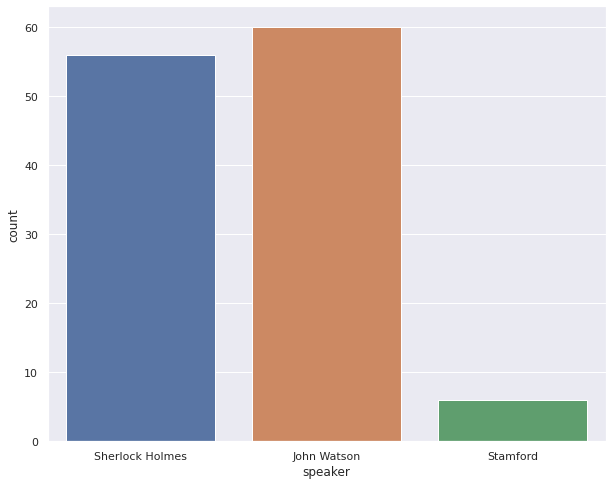

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x=litDf['speaker'])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# Pre-processing 2

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter

vectorizer = CountVectorizer()
tfidfconverter = TfidfTransformer()

def get_word_weights(speaker, vectorizer, tfidfconverter):
  # X_raw = litDf['talk']
  X_raw = litDf.loc[(litDf['speaker'] == speaker),'talk']
  X = vectorizer.fit_transform(X_raw).toarray()

  X = tfidfconverter.fit_transform(X).toarray()

  # print idf values 
  df_idf = pd.DataFrame(tfidfconverter.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"]) 
  df_idf = df_idf.sort_values(by=['idf_weights'])

  sns.barplot(x=df_idf.index[::20][:10], y=df_idf['idf_weights'][::20][:10]) # every 20 row until get 10 items
  plt.show()
  
  return df_idf

def get_train_test_set(litDf, vectorizer, tfidfconverter):
  X_raw = litDf['talk']
  y = litDf['speaker']

  # vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(X_raw).toarray()

  # tfidfconverter = TfidfTransformer()
  X = tfidfconverter.fit_transform(X).toarray()

  #Use SMOTE for upsampling
  su = SMOTE(random_state=42)
  X, y = su.fit_resample(X, y)

  print(f"Balanced Counts:\n{Counter(y)}\n")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  return X_train, X_test, y_train, y_test

1. Compare the word weight of dialgoue for each character, by plotting the bar chart and showing the table

Sherlock Holmes 's word weight: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


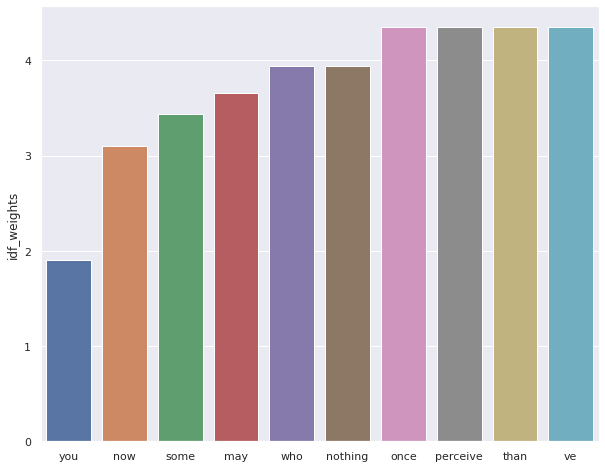

,idf_weights
you,1.907557
to,1.998529
the,2.209838
is,2.270463
have,2.403994
...,...
furniture,4.349904
from,4.349904
friends,4.349904
gives,4.349904


John Watson 's word weight: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


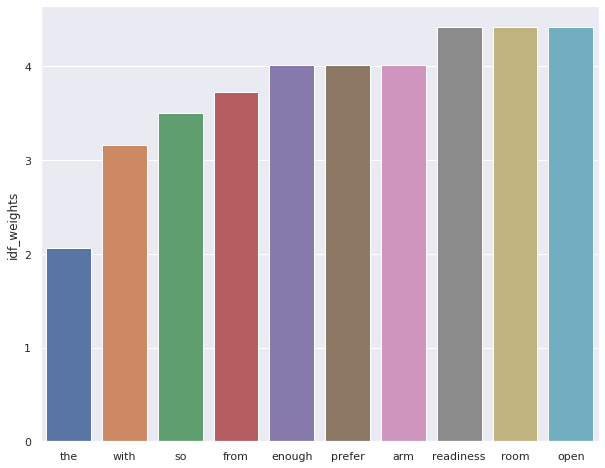

,idf_weights
the,2.066351
you,2.166435
to,2.166435
it,2.220502
and,2.338285
...,...
ineffable,4.417727
individuals,4.417727
indeed,4.417727
ill,4.417727


Stamford 's word weight: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


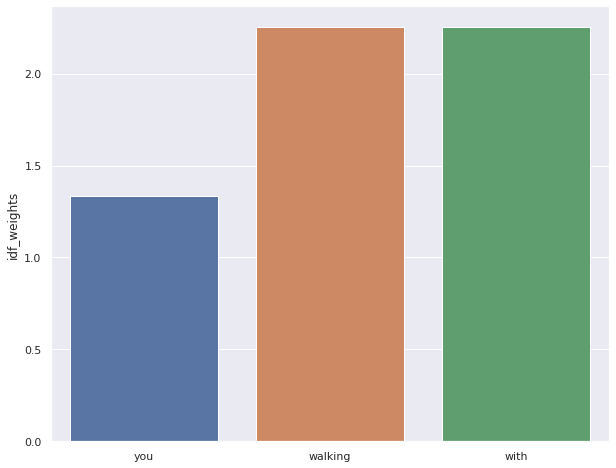

,idf_weights
you,1.336472
of,1.847298
on,1.847298
here,1.847298
to,1.847298
one,2.252763
paper,2.252763
past,2.252763
police,2.252763
seem,2.252763


In [24]:
sp_name = litDf['speaker'].unique().tolist()

for i in range(len(sp_name)):
  print(sp_name[i], "'s word weight: ")
  df_idf = get_word_weights(sp_name[i], vectorizer, tfidfconverter)
  display(df_idf)

2. Balance the dataset, and split into train and test set

In [25]:
X_train, X_test, y_train, y_test = get_train_test_set(litDf, vectorizer, tfidfconverter)

print('Train dataset: x=%s, y=%s\n' % (X_train.shape, y_train.shape))
print('Test dataset: x=%s, y=%s' % (X_test.shape, y_test.shape))

Balanced Counts:
Counter({'Sherlock Holmes': 60, 'John Watson': 60, 'Stamford': 60})

Train dataset: x=(144, 742), y=(144,)

Test dataset: x=(36, 742), y=(36,)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def get_cmatrix(y_test, y_pred):

  cmatrix = confusion_matrix(y_test,y_pred)

  ax = sns.heatmap(cmatrix, annot=True, cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['John Watson','Sherlock Holmes','Stamford'])
  ax.yaxis.set_ticklabels(['John Watson','Sherlock Holmes','Stamford'])
  ## Display the visualization of the Confusion Matrix.
  plt.show()

def get_train_result(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  print(classification_report(y_test,y_pred))
  print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  get_cmatrix(y_test, y_pred)

# Naive Bayes Classifier

## Hyper-parameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

def best_params_result(clf, X_train, y_train, X_test, y_test):
  tuned_parameters = [{'n_estimators': [10,50,100,200],
                      'max_depth': [5,10,20,50]}]
  clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, refit = True, cv=5)
  clf.fit(X_train, y_train)

  print("\nGrid scores on development set:\n")

  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
      print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

  print("Best parameters set found on development set:\n")
  print(clf.best_params_)
  print(clf.best_estimator_)
  print(clf.best_score_)

  clf_best = clf.best_estimator_
  grid_predictions = clf_best.predict(X_test) 
    
  # print classification report 
  print("\nPrediction report with the best parameters:\n")
  print(classification_report(y_test, grid_predictions)) 

  print('Accuracy score : {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

  get_cmatrix(y_test, grid_predictions)

  return clf_best

1. Shows the result of training with the best parameter (after hyper-parameter tuning)

### GaussianNB

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.001)
0.7228571428571428

Prediction report with the best parameters:

                 precision    recall  f1-score   support

    John Watson       0.33      0.23      0.27        13
Sherlock Holmes       0.46      0.46      0.46        13
       Stamford       0.71      1.00      0.83        10

       accuracy                           0.53        36
      macro avg       0.50      0.56      0.52        36
   weighted avg       0.49      0.53      0.50        36

Accuracy score : 0.53


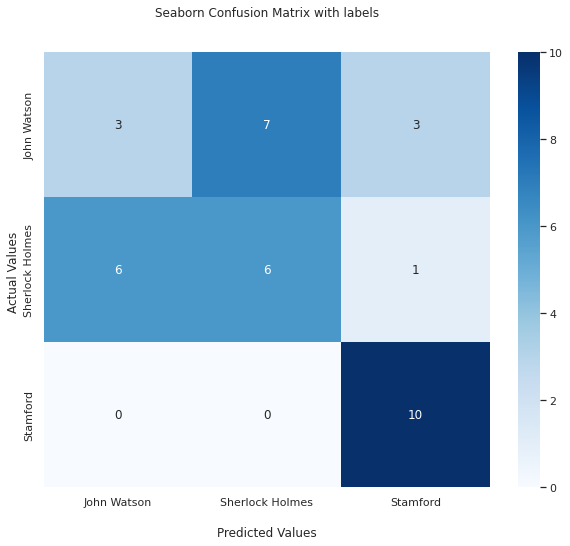

In [28]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.best_score_)

clf_best = nbModel_grid.best_estimator_
grid_predictions = clf_best.predict(X_test) 
    
# print classification report 
print("\nPrediction report with the best parameters:\n")
print(classification_report(y_test, grid_predictions)) 

print('Accuracy score : {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

get_cmatrix(y_test, grid_predictions)

### BernoulliNB

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Test Accuracy : 0.500
Best Accuracy Through Grid Search : 0.778
Best Parameters :  {'alpha': 0.01}

Prediction report with the best parameters:

                 precision    recall  f1-score   support

    John Watson       0.22      0.15      0.18        13
Sherlock Holmes       0.35      0.46      0.40        13
       Stamford       1.00      1.00      1.00        10

       accuracy                           0.50        36
      macro avg       0.53      0.54      0.53        36
   weighted avg       0.49      0.50      0.49        36



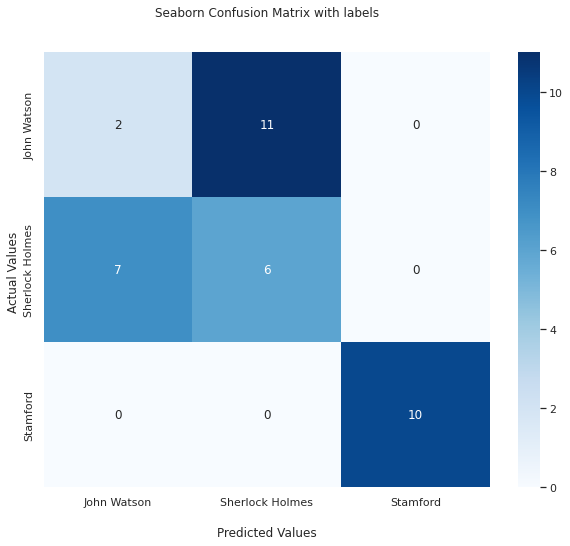

In [29]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train,y_train)

print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

clf_best = bernoulli_nb_grid.best_estimator_
grid_predictions = clf_best.predict(X_test) 
    
# # print classification report 
# print("\nPrediction report with the best parameters:\n")
# print(classification_report(y_test, grid_predictions)) 

# print('Accuracy score : {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

# get_cmatrix(y_test, grid_predictions)

# print classification report 
print("\nPrediction report with the best parameters:\n")
print(classification_report(y_test, bernoulli_nb_grid.best_estimator_.predict(X_test))) 

get_cmatrix(y_test, bernoulli_nb_grid.best_estimator_.predict(X_test))

### MultinomialNB

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Test Accuracy : 0.583
Best Accuracy Through Grid Search : 0.723
Best Parameters :  {'alpha': 0.01}

Prediction report with the best parameters:

                 precision    recall  f1-score   support

    John Watson       0.44      0.31      0.36        13
Sherlock Holmes       0.47      0.54      0.50        13
       Stamford       0.83      1.00      0.91        10

       accuracy                           0.58        36
      macro avg       0.58      0.62      0.59        36
   weighted avg       0.56      0.58      0.56        36



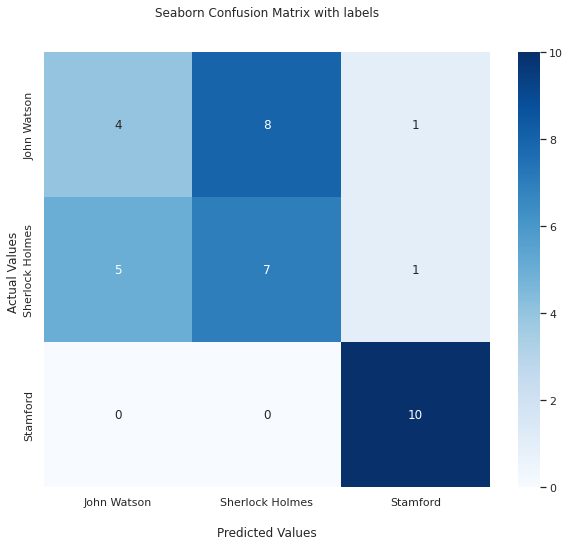

In [30]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)

print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

# print classification report 
print("\nPrediction report with the best parameters:\n")
print(classification_report(y_test, multinomial_nb_grid.best_estimator_.predict(X_test))) 

get_cmatrix(y_test, multinomial_nb_grid.best_estimator_.predict(X_test))

### ComplementNB

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Test Accuracy : 0.556
Best Accuracy Through Grid Search : 0.709
Best Parameters :  {'alpha': 0.01}

Prediction report with the best parameters:

                 precision    recall  f1-score   support

    John Watson       0.44      0.31      0.36        13
Sherlock Holmes       0.43      0.46      0.44        13
       Stamford       0.77      1.00      0.87        10

       accuracy                           0.56        36
      macro avg       0.55      0.59      0.56        36
   weighted avg       0.53      0.56      0.53        36



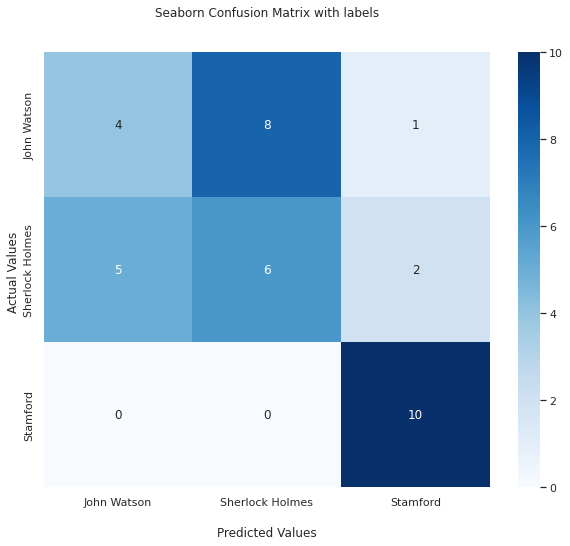

In [31]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(X_train,y_train)

print('Test Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%complement_nb_grid.best_score_)
print('Best Parameters : ',complement_nb_grid.best_params_)

# print classification report 
print("\nPrediction report with the best parameters:\n")
print(classification_report(y_test, complement_nb_grid.best_estimator_.predict(X_test))) 

get_cmatrix(y_test, complement_nb_grid.best_estimator_.predict(X_test))

# Random Forest Classifier

1. Shows the result of training with the best parameter (after hyper-parameter tuning)


Grid scores on development set:

0.701 (± 0.064) for {'max_depth': 5, 'n_estimators': 10}

0.680 (± 0.170) for {'max_depth': 5, 'n_estimators': 50}

0.681 (± 0.169) for {'max_depth': 5, 'n_estimators': 100}

0.694 (± 0.204) for {'max_depth': 5, 'n_estimators': 200}

0.688 (± 0.113) for {'max_depth': 10, 'n_estimators': 10}

0.639 (± 0.169) for {'max_depth': 10, 'n_estimators': 50}

0.701 (± 0.092) for {'max_depth': 10, 'n_estimators': 100}

0.708 (± 0.069) for {'max_depth': 10, 'n_estimators': 200}

0.689 (± 0.248) for {'max_depth': 20, 'n_estimators': 10}

0.674 (± 0.125) for {'max_depth': 20, 'n_estimators': 50}

0.688 (± 0.154) for {'max_depth': 20, 'n_estimators': 100}

0.695 (± 0.132) for {'max_depth': 20, 'n_estimators': 200}

0.661 (± 0.172) for {'max_depth': 50, 'n_estimators': 10}

0.723 (± 0.112) for {'max_depth': 50, 'n_estimators': 50}

0.709 (± 0.159) for {'max_depth': 50, 'n_estimators': 100}

0.737 (± 0.125) for {'max_depth': 50, 'n_estimators': 200}

Best parameters se

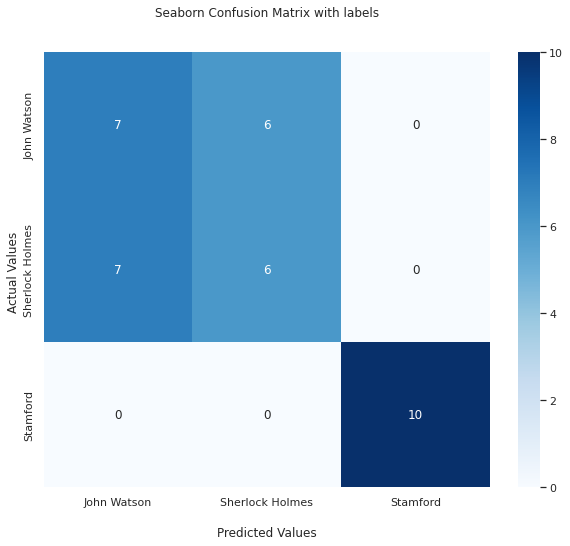

In [32]:
clf = RandomForestClassifier(max_depth=50, n_estimators=100, random_state=0)
clf = best_params_result(clf, X_train, y_train, X_test, y_test)

# Check the result on UI

In [33]:
def get_str_prediction(sentence, clf, vectorizer):
  speaker = clf.predict(vectorizer.transform([sentence]))
  pattern = "'[]"
  result = str(speaker).translate(str.maketrans('', '', pattern))

  return result

In [34]:
from ipywidgets import widgets, Layout, ButtonStyle

def sentence_predict():
  title = 'Character Profiling'
  htmlWidget = widgets.HTML(value = f"<b><font color='lightblue'><font size=5>{title}</b>")
  display(htmlWidget)

  label = 'Enter a sentence'
  label_widget = widgets.HTML(value = f"<b>{label}</b>")
  # label = widgets.Label('Enter a sentence')
  display(label_widget)

  text = widgets.Text()
  display(text)

  btn = widgets.Button(description="Confirm",
                 layout=Layout(width='auto', grid_area='sidebar'),
                 style=ButtonStyle(button_color='lightblue'))
  # btn.style.button_color = 'lightblue'
  display(btn)

  # line = '----------------------------------------------------------------------'
  # htmlWidget2 = widgets.HTML(value = f"<b><font color='lightblue'>{line}</b>")
  # display(htmlWidget2)

  space = '.'
  spacing = widgets.HTML(value = f"<font color='white'>{space}")
  display(spacing)

  # label2 = widgets.Label()
  # display(label2)

  label2 = 'Speaker'
  label2widget = widgets.HTML(value = f"<b>{label2}</b>")
  display(label2widget)

  result = widgets.Label()
  display(result)

  display(spacing)
  def Enter(b):
    sentence = text.value
    speaker = get_str_prediction(sentence, clf, vectorizer)
    # label2.value = 'Speaker'
    result.value = speaker
  
  btn.on_click(Enter)

In [35]:
sentence_predict()

HTML(value="<b><font color='lightblue'><font size=5>Character Profiling</b>")

HTML(value='<b>Enter a sentence</b>')

Text(value='')

Button(description='Confirm', layout=Layout(grid_area='sidebar', width='auto'), style=ButtonStyle(button_color…

HTML(value="<font color='white'>.")

HTML(value='<b>Speaker</b>')

Label(value='')

HTML(value="<font color='white'>.")